In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [379]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv'
df = pd.read_csv(url)
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [380]:
list(df['movie'].unique())

['Reservoir Dogs',
 'Pulp Fiction',
 'Kill Bill: Vol. 1',
 'Kill Bill: Vol. 2',
 'Inglorious Basterds',
 'Django Unchained',
 'Jackie Brown']

In [381]:
words = list(df.loc[df['type'] == 'word','word'].unique())

In [382]:
def col_search(col_list, search, print_list = 'off'):
    j = [x for x in col_list if search in x]
    if print_list == 'on':
        print(j)
    return j

In [383]:
fuck_type = col_search(words, 'fuck')
ass_type = col_search(words, 'ass')
shit_type = col_search(words, 'shit')
damn_type = col_search(words, 'damn')

In [384]:
search_list = ['dick', 'fuck', 'ass', 'shit', 'damn', 'bitch', 'n-word']

In [385]:
tmp_dict = {}
for word in search_list:
    match_list = col_search(words, word)
    for k in match_list:
        tmp_dict[k] = word

In [386]:
other = list(filter(lambda x: x not in tmp_dict.keys(),words))

In [387]:
for word in other:
    tmp_dict[word] = 'other'

In [388]:
df['word_fix'] = df['word'].map(tmp_dict)

In [389]:
df['word_fix'].value_counts()

fuck      772
shit      252
n-word    179
ass       162
damn      154
other      92
bitch      73
dick       20
Name: word_fix, dtype: int64

In [390]:
df['movie_word_count'] = df.groupby(['movie','word_fix']).cumcount()
df['type_count'] = df.groupby(['movie','type']).cumcount()

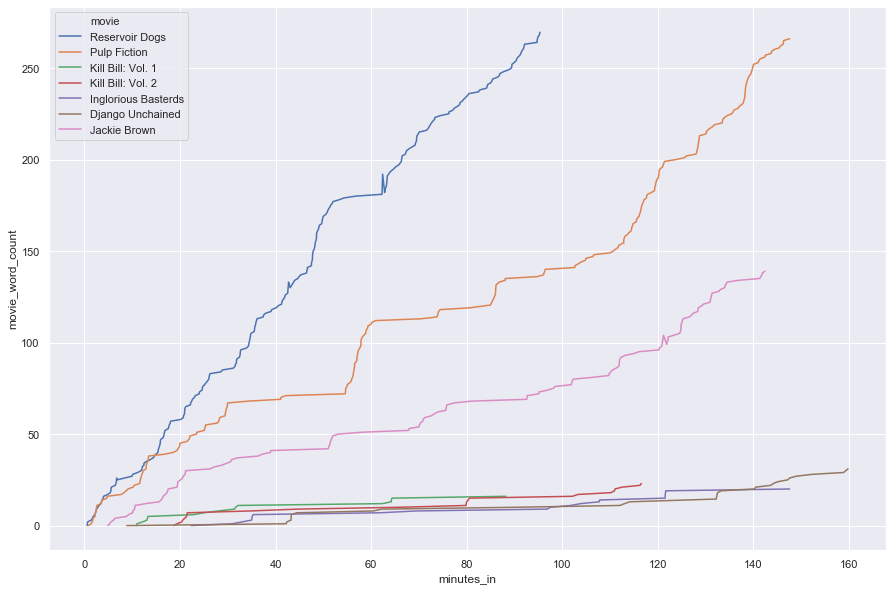

In [281]:
plt.figure(figsize = (15,10))
data = df[df['word_fix'] == 'fuck']
ax = sns.lineplot(x="minutes_in", y="movie_word_count", hue="movie",data=data)

In [317]:
people_a = ['Rona','JD','Jason','Mike','Kim','Marc','Justin']

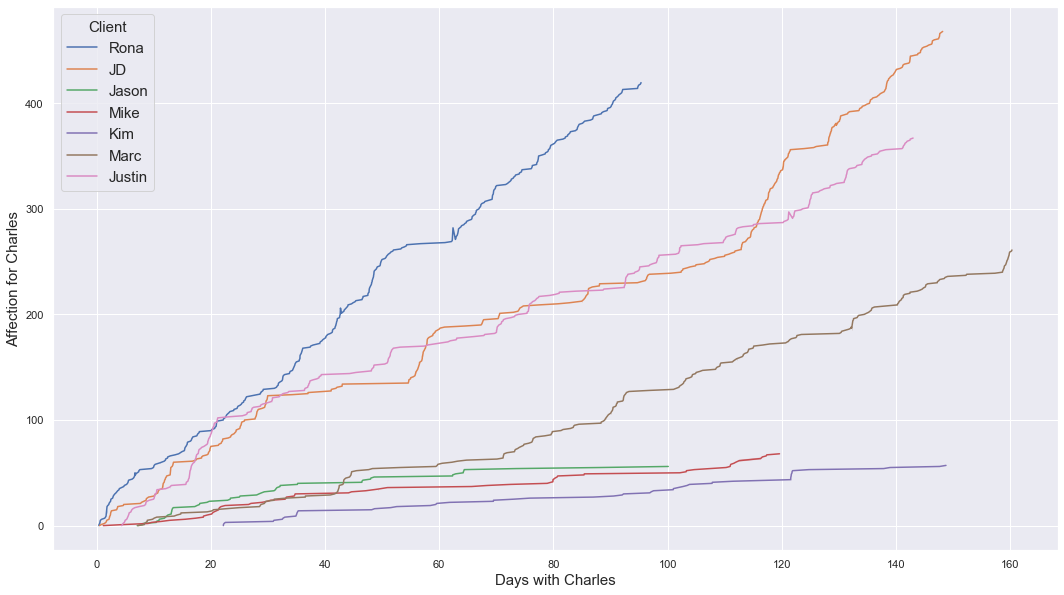

In [318]:
plt.figure(figsize = (18,10))
data = df[df['type'] == 'word']

ax = sns.lineplot(x="minutes_in", y="type_count", hue="movie",data=data, legend = False)
plt.xlabel('Days with Charles', fontsize=15)
plt.ylabel('Affection for Charles', fontsize=15)
leg = plt.legend(loc='upper left', labels = people_a, prop={'size': 15})
leg.set_title('Client',prop={'size':15})
plt.show()

In [320]:
people_b = ['JQ','Zyla','Andrea','Aih','Xandie','Dani','Sammy']

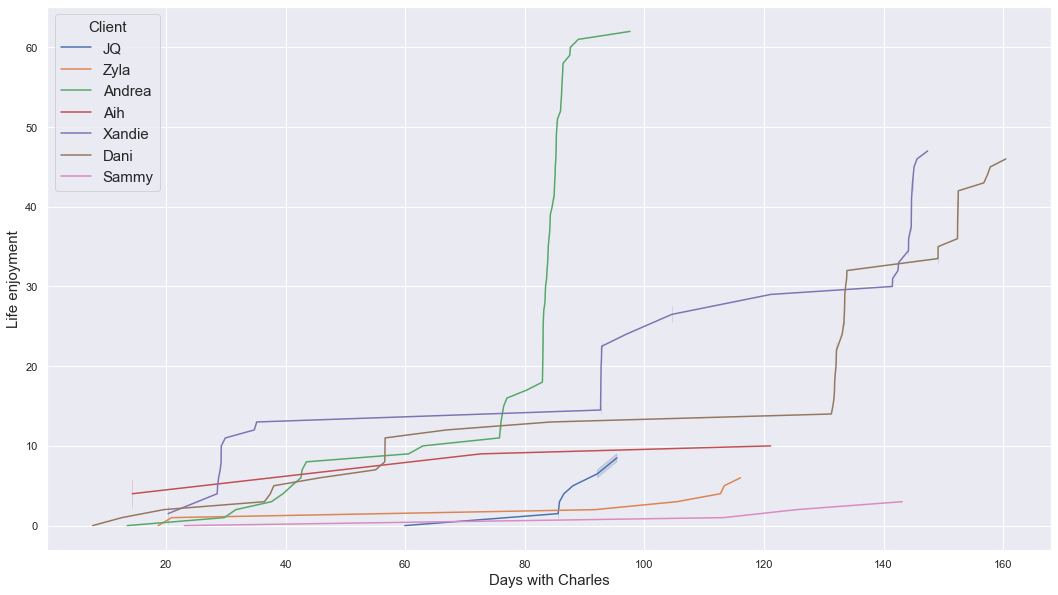

In [321]:
plt.figure(figsize = (18,10))
data = df[df['type'] == 'death']

ax = sns.lineplot(x="minutes_in", y="type_count", hue="movie",data=data, legend = False)
plt.xlabel('Days with Charles', fontsize=15)
plt.ylabel('Life enjoyment', fontsize=15)
leg = plt.legend(loc='upper left', labels = people_b, prop={'size': 15})
leg.set_title('Client',prop={'size':15})
plt.show()

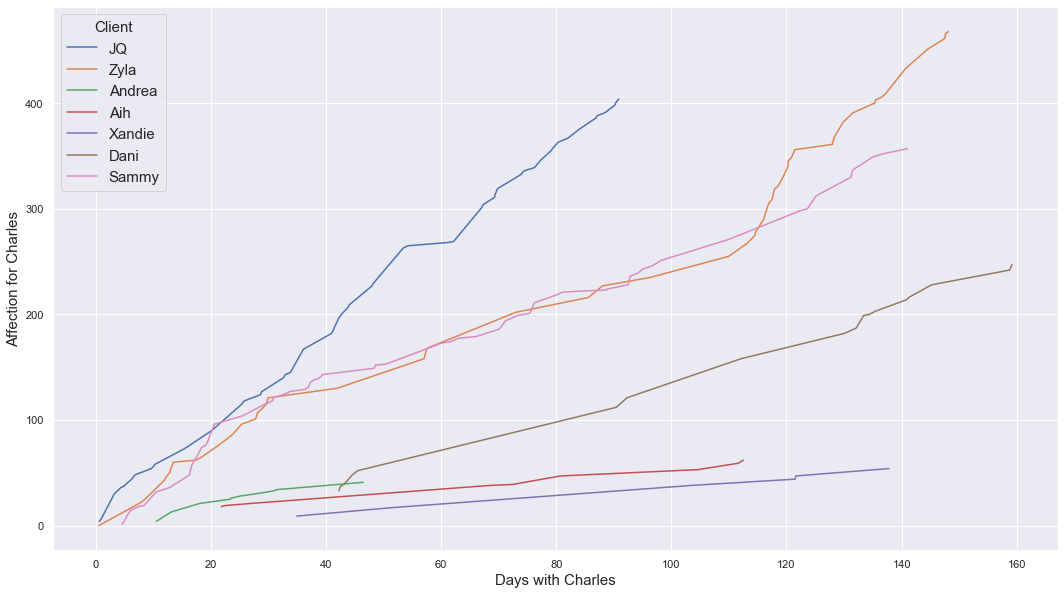

In [322]:
plt.figure(figsize = (18,10))
data = df[df['word_fix'] == 'shit']

ax = sns.lineplot(x="minutes_in", y="type_count", hue="movie",data=data, legend = False)
plt.xlabel('Days with Charles', fontsize=15)
plt.ylabel('Affection for Charles', fontsize=15)
leg = plt.legend(loc='upper left', labels = people_b, prop={'size': 15})
leg.set_title('Client',prop={'size':15})
plt.show()

In [298]:
df.loc[df['type'] == 'death','movie'].value_counts().reset_index()

,index,movie
0,Kill Bill: Vol. 1,63
1,Inglorious Basterds,48
2,Django Unchained,47
3,Kill Bill: Vol. 2,11
4,Reservoir Dogs,10
5,Pulp Fiction,7
6,Jackie Brown,4


In [304]:
total_swear = df[['movie','word_fix']].groupby(['movie','word_fix']).agg(word_count = ('word_fix',len)).reset_index()

In [309]:
total_swear[total_swear['word_fix'] == 'shit']

,movie,word_fix,word_count
6,Django Unchained,shit,19
12,Inglorious Basterds,shit,6
20,Jackie Brown,shit,74
27,Kill Bill: Vol. 1,shit,10
33,Kill Bill: Vol. 2,shit,10
41,Pulp Fiction,shit,78
49,Reservoir Dogs,shit,55


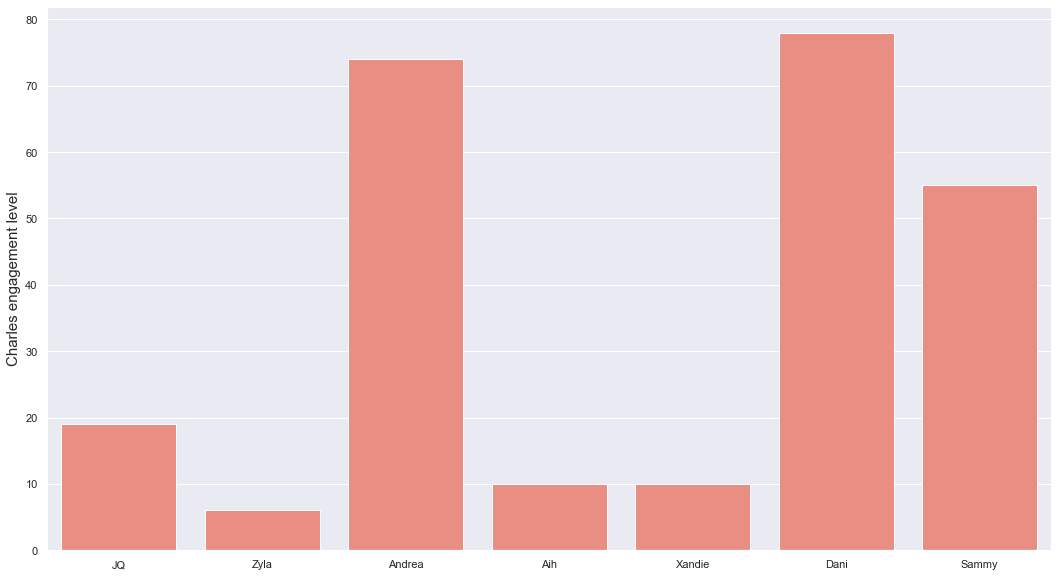

In [327]:
plt.figure(figsize = (18,10))
data = total_swear[total_swear['word_fix'] == 'shit']
ax = sns.barplot(x = people_b, y="word_count", color = "salmon",data=data)
plt.ylabel('Charles engagement level', fontsize=15)
plt.show()

In [364]:
charles_amt = ["No Charles", "Moderate Charles", "A little Charles", "A lot of charles"]

In [421]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("9 1 2019", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A lot of charles", "Moderate Charles", "A little Charles", "No Charles"])
data = data.rolling(7).mean()

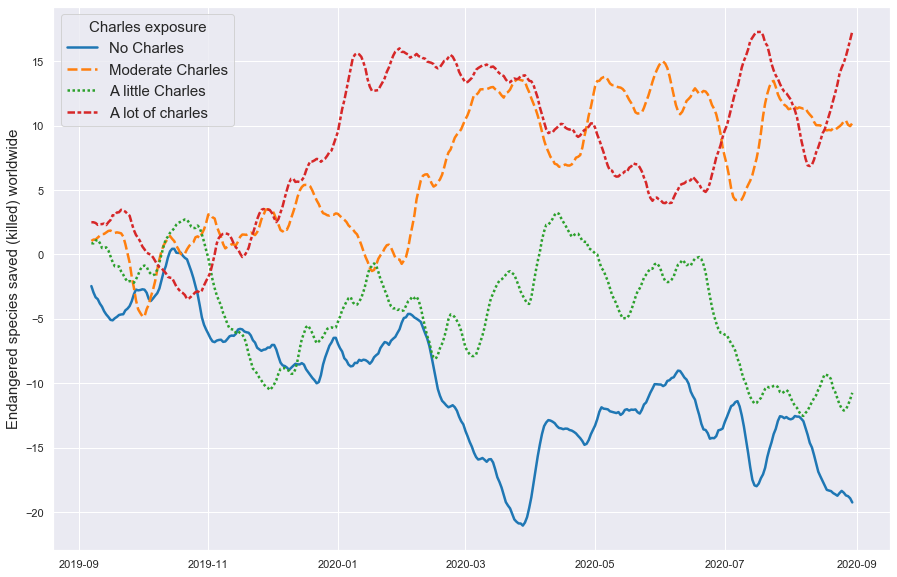

In [422]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.ylabel(r'Endangered species saved (killed) worldwide', fontsize=15)
leg = plt.legend(loc='upper left', labels = charles_amt, prop={'size': 15})
leg.set_title('Client',prop={'size':15})
plt.show()

<Figure size 1080x720 with 0 Axes>

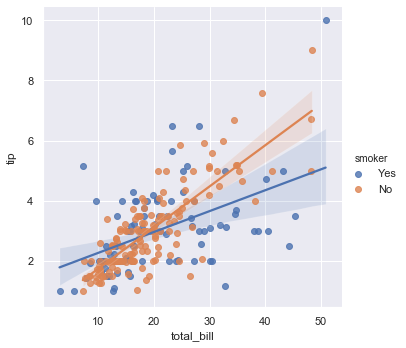

In [447]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

In [393]:
total_swear.head()

,movie,word_fix,word_count
0,Django Unchained,ass,29
1,Django Unchained,bitch,15
2,Django Unchained,damn,42
3,Django Unchained,fuck,32
4,Django Unchained,n-word,114


In [417]:
map1 = {'Yes':'Charles','No': 'No Charles'}
tips['charles'] = tips['smoker'].map(map1)
map2 = {'Thur':'Opera Haus','Fri': 'Pineapple Lab','Sat':'Snakes and Ladders','Sun':'Commune'}
tips['location'] = tips['day'].map(map2)

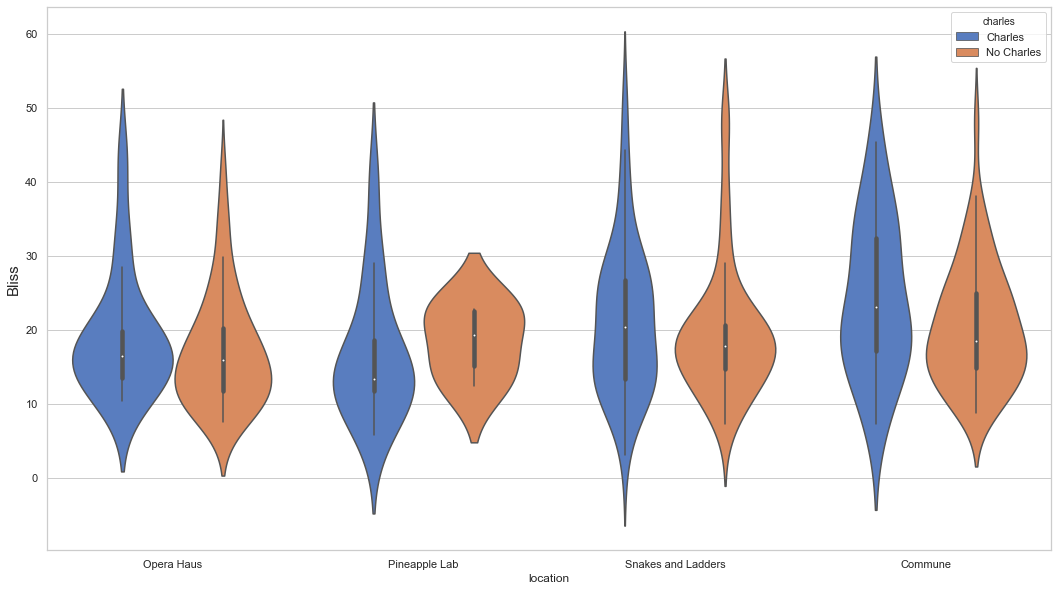

In [419]:
plt.figure(figsize = (18,10))
ax = sns.violinplot(x="location", y="total_bill", hue="charles",
                    data=tips, palette="muted")
# plt.xlabel('Days with Charles', fontsize=15)
plt.ylabel('Bliss', fontsize=15)
# leg = plt.legend(loc='upper left', labels = people_b, prop={'size': 15})
# leg.set_title('Client',prop={'size':15})
plt.show()

In [465]:
tips

,total_bill,tip,sex,smoker,day,time,size,charles,location
0,16.99,1.01,Female,No,Sun,Dinner,2,No Charles,Commune
1,10.34,1.66,Male,No,Sun,Dinner,3,No Charles,Commune
2,21.01,3.50,Male,No,Sun,Dinner,3,No Charles,Commune
3,23.68,3.31,Male,No,Sun,Dinner,2,No Charles,Commune
4,24.59,3.61,Female,No,Sun,Dinner,4,No Charles,Commune
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,No Charles,Snakes and Ladders
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Charles,Snakes and Ladders
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Charles,Snakes and Ladders
242,17.82,1.75,Male,No,Sat,Dinner,2,No Charles,Snakes and Ladders


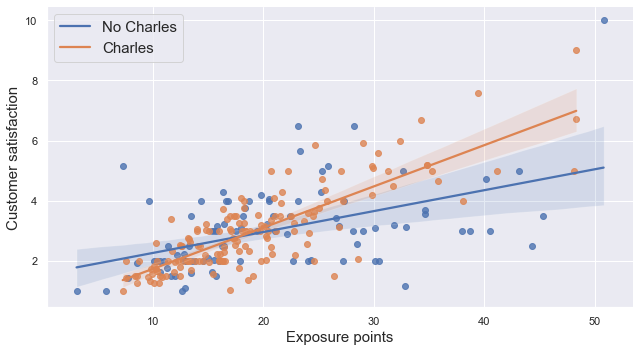

In [472]:
ax = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, aspect = 18/10, legend = False)

plt.xlabel('Exposure points', fontsize=15)
plt.ylabel('Customer satisfaction', fontsize=15)
leg = plt.legend(loc='upper left', labels = ['No Charles','Charles'], prop={'size': 15})
# leg.set_title('Client',prop={'size':15})

<Figure size 1296x720 with 0 Axes>

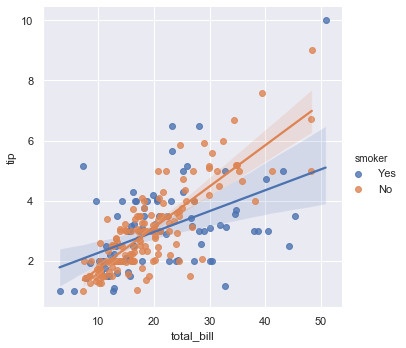

In [449]:
plt.figure(figsize = (18,10)
sns.lmplot(x='total_bill', y = 'tip', hue='smoker', data = tips)

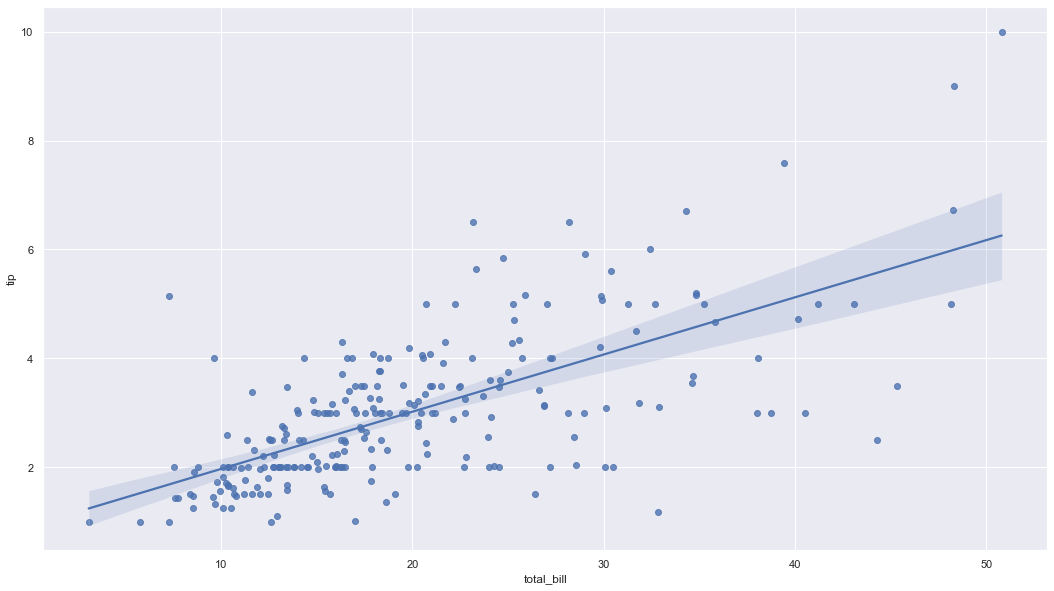

In [454]:
plt.figure(figsize = (18,10))
ax = sns.regplot(x="total_bill", y="tip", data=tips)


In [459]:
rcParams['figure.figsize'] = (18,10)
g = sns.lmplot(x="total_bill", y="tip", data=tips)

NameError: name 'rcParams' is not defined